# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.10600600000000004
Average number of iterations is 5.468.


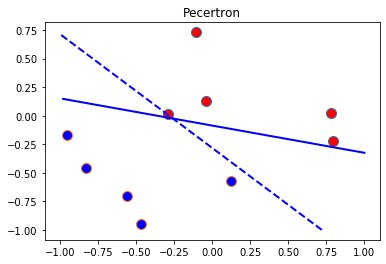

E_train is 0.0, E_test is 0.014095999999999968
Average number of iterations is 20.458.


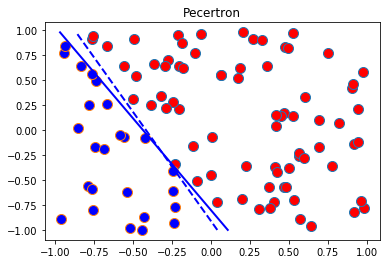

In [2]:
from perceptron import perceptron

def mktest(w_f, nTest):
    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    return X_test, y_test

nRep = 1000 # number of replicates
nTrain = 10 # number of training data
nTest = 1000
totalIter, totTrainError, totTestError = 0, 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    X_test, y_test = mktest(w_f, nTest)
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations
    totalIter += iters
    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
print('Average number of iterations is {}.'.format(totalIter/nRep))
plotdata(X, y, w_f, w_g, 'Pecertron')


nTrain = 100 # number of training data
totalIter, totTrainError, totTestError = 0, 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    X_test, y_test = mktest(w_f, nTest)
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations
    totalIter += iters
    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
print('Average number of iterations is {}.'.format(totalIter/nRep))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

1001


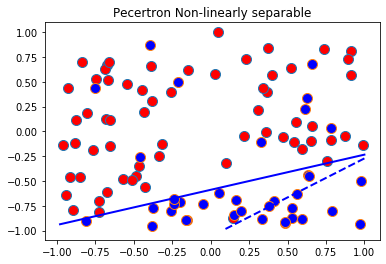

In [3]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
print(iters)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.03982000000000016, E_test is 0.050033


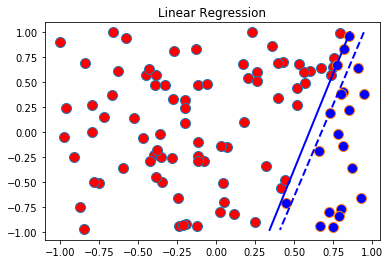

In [7]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 1000

totTrainError, totTestError = 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    X_test, y_test = mktest(w_f, nTest)
    w_g = linear_regression(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations

    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13207000000000008, E_test is 0.059712999999999995


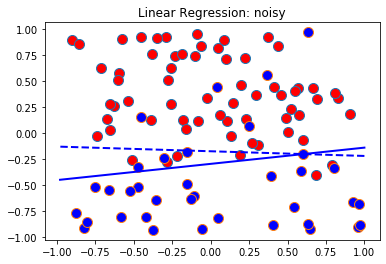

In [8]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 1000

totTrainError, totTestError = 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    X_test, y_test = mktest(w_f, nTest)
    w_g = linear_regression(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations

    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [9]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
def error(X, y, w):
    P,N=X.shape
    X = np.concatenate([np.ones((1,N)),X],axis=0)
    return len(np.argwhere(np.dot(w.T,X)*y<=0))/N

print('E_train is {}, E_test is {}'.format(error(X,y,w), error(X_test,y_test,w)))
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,include_bias=False)
# poly_fit with transform
X_t = poly.fit_transform(X.T).T  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = poly.fit_transform(X_test.T).T  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
print('E_train is {}, E_test is {}'.format(error(X_t,y,w), error(X_test_t,y_test,w)))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.006400000000000004, E_test is 0.018229999999999982
Average number of iterations is 1590.68.


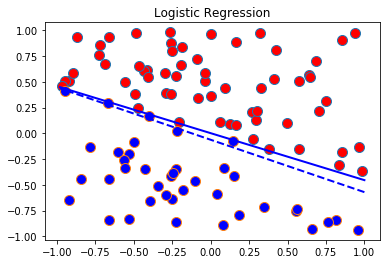

In [10]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 1000

totalIter, totTrainError, totTestError = 0, 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    X_test, y_test = mktest(w_f, nTest)
    w_g, iters = logistic(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations
    totalIter += iters
    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
print('Average number of iterations is {}.'.format(totalIter/nRep))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.12289999999999997, E_test is 0.04445999999999997
Average number of iterations is 3001.0.


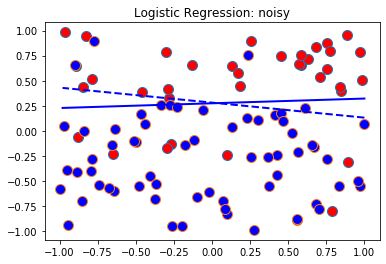

In [11]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 1000; # number of training data

totalIter, totTrainError, totTestError = 0, 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    X_test, y_test = mktest(w_f, nTest)
    w_g, iters = logistic(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations
    totalIter += iters
    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
print('Average number of iterations is {}.'.format(totalIter/nRep))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.010936999999999978
Average number of iterations is 3.067.


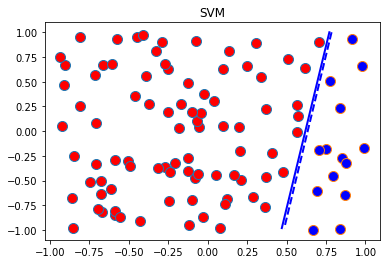

In [18]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 1000

totalIter, totTrainError, totTestError = 0, 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    X_test, y_test = mktest(w_f, nTest)
    w_g, iters = svm(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations
    totalIter += iters
    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
print('Average number of iterations is {}.'.format(totalIter/nRep))
plotdata(X, y, w_f, w_g, 'SVM')

In [29]:
distance = np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))) * y
print(distance.reshape(-1)[0])

0.9999999999999554


E_train is 0.0, E_test is 0.03452699999999997
Average number of iterations is 2.349.


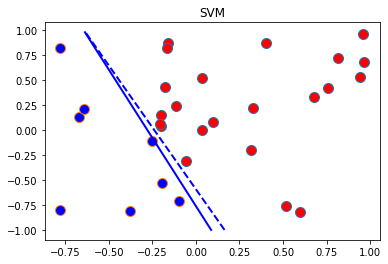

In [16]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 30; # number of training data
nTest = 1000

totalIter, totTrainError, totTestError = 0, 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    X_test, y_test = mktest(w_f, nTest)
    w_g, iters = svm(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations
    totalIter += iters
    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
print('Average number of iterations is {}.'.format(totalIter/nRep))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.3857299999999998, E_test is 0.3809579999999998
Average number of iterations is 18.045.


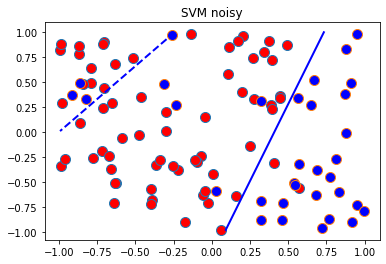

In [15]:
totalIter, totTrainError, totTestError = 0, 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    X_test, y_test = mktest(w_f, nTest)
    w_g, iters = svm(X, y)
    # Compute training, testing error
    train_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))*y < 0) / X.shape[1] 
    test_error = np.sum(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))*y_test < 0) / X_test.shape[1]
    # Sum up number of iterations
    totalIter += iters
    totTrainError += train_error
    totTestError += test_error
print('E_train is {}, E_test is {}'.format(totTrainError/nRep, totTestError/nRep))
print('Average number of iterations is {}.'.format(totalIter/nRep))
plotdata(X, y, w_f, w_g, 'SVM noisy')